# 과제1: tensorflow를 이용한 NN 밑바닥부터 구현
input feature가 100개이고,  
hidden layer가 2개이고 neuron이 각각 50,10개이고,  
output이 5개인 NN를 구현해 보자  
* hidden layer는 relu를 activation function으로, output layer는 softmax를 activation function으로 사용

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
n_x = 100
n_h1 = 50
n_h2 = 10
n_y = 5

In [ ]:
# Simulate train set
m = 500

x_train=np.random.randn(m,n_x).astype(np.float32)
y_train=np.zeros((m,n_y)).astype(np.float32)
y_train[np.arange(m),np.random.randint(n_y,size=m)]=1

print(x_train)
print(y_train)

[[ 0.46275425  1.9163489  -0.00747802 ...  1.3979049   0.30187672
   0.47847122]
 [-1.1088767   1.0358155  -0.33549798 ...  0.71618193 -0.16110682
   0.8601247 ]
 [ 0.30264163  0.5065551  -0.5769423  ... -2.6746285   0.65562034
  -2.9993312 ]
 ...
 [-0.8928456  -1.0112306   0.37998277 ... -0.73301303 -0.54148626
  -2.4134855 ]
 [ 1.1366829  -0.26641563  0.9337496  ...  0.21240567 -1.4176909
   1.1721666 ]
 [-0.3191691  -0.17865932  0.54980797 ...  0.94799215 -0.48200387
   0.06552852]]
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


* Initialization of weights

In [ ]:
w1=tf.Variable(1e-3*np.random.randn(n_x,n_h1).astype(np.float32),name="w1")
## 코드를 작성해 보세요 ##
w2=tf.Variable(1e-3*np.random.randn(n_h1,n_h2).astype(np.float32),name="w2")
w3=tf.Variable(1e-3*np.random.randn(n_h2,n_y).astype(np.float32),name="w3")

b1=tf.Variable(np.random.randn(1,n_h1).astype(np.float32),name="b1")
b2=tf.Variable(np.random.randn(1,n_h2).astype(np.float32),name="b2")
b3=tf.Variable(np.random.randn(1,n_y).astype(np.float32),name="b3")

* forward propagation을 통해 prediction 값을 구하고, loss를 구하는 function을 만들어 봅시다

In [ ]:
def forward(x,w1,w2,w3,b1,b2,b3):
    z1=tf.matmul(x,w1)
    z1=tf.add(z1,b1)
    a1=tf.nn.relu(z1)
    ## 코드를 작성해 보세요 ##
    z2=tf.matmul(z1,w2)
    z2=tf.add(z2,b2)
    a2=tf.nn.relu(z2)
    z3=tf.matmul(z2,w3)
    z3=tf.add(z3,b3)
    predictions = tf.nn.softmax(z3)
    
    return predictions

def loss_fn(predictions, y):
    loss= -tf.reduce_sum(y*tf.math.log(predictions))
    return loss    

In [ ]:
forward(x_train,w1,w2,w3,b1,b2,b3)

<tf.Tensor: shape=(500, 5), dtype=float32, numpy=
array([[0.04574326, 0.3132725 , 0.14423594, 0.36726084, 0.12948745],
       [0.04574323, 0.31327242, 0.14423595, 0.36726078, 0.1294876 ],
       [0.04574326, 0.31327248, 0.14423595, 0.36726084, 0.12948748],
       ...,
       [0.04574328, 0.31327245, 0.14423592, 0.36726084, 0.1294875 ],
       [0.04574326, 0.31327227, 0.14423598, 0.36726093, 0.12948751],
       [0.04574326, 0.3132725 , 0.14423592, 0.36726078, 0.12948747]],
      dtype=float32)>

In [ ]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
loss_fn(forward(x_train,w1,w2,w3,b1,b2,b3),y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=932.6084>

* backpropagation & update parameters

In [ ]:
learning_rate=1e-2
optimizer=tf.keras.optimizers.Adam(learning_rate)

def train_step(x,w1,w2,w3,b1,b2,b3, y):
    with tf.GradientTape() as tape:
        predictions = forward(x,w1,w2,w3,b1,b2,b3)
        loss = loss_fn(predictions, y)
    ## 코드를 작성해 보세요 ## (hint: tape.gradient를 구글링 해보세요)
    gradient = tape.gradient(predictions,[w1,w2,w3,b1,b2,b3])
    # optimizer와 위에서 구한 경사도를 이용해 가중치들을 업데이트 합니다.
    optimizer.apply_gradients(zip(gradient, [w1, w2,w3,b1,b2,b3]))
    return loss, w1, w2,w3,b1,b2,b3


* 간단하게 train loop를 작성해 loss가 줄어나가는지 확인해 봅시다.

In [ ]:
loss_list = []

for step in range(10): 
    loss, w1, w2 ,w3,b1,b2,b3= train_step(x_train,w1,w2,w3,b1,b2,b3, y_train)
    loss_list.append(loss.numpy())
    
print(loss_list)

[907.1267, 905.1369, 903.5352, 900.70154, 897.5695, 894.2792, 890.90314, 887.1842, 883.03375, 878.9144]


# 과제2: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [ ]:
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [ ]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

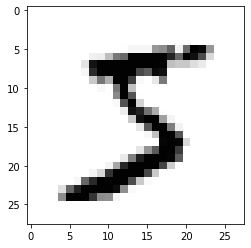

In [ ]:
plt.imshow(x_train[0]).set_cmap('Greys')

In [ ]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [ ]:
y_train.shape

(60000,)

In [ ]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [ ]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
model = Sequential()
model.add(Dense(256, input_dim=(28*28),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

내가 만든 모델을 확인해 봅시다.

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=2000)

Epoch 1/20
24/24 [==============================] - 2s 64ms/step - loss: 0.0545 - accuracy: 0.9833 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 2/20
24/24 [==============================] - 1s 63ms/step - loss: 0.0534 - accuracy: 0.9839 - val_loss: 0.0706 - val_accuracy: 0.9793
Epoch 3/20
24/24 [==============================] - 2s 63ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0705 - val_accuracy: 0.9794
Epoch 4/20
24/24 [==============================] - 2s 63ms/step - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.0703 - val_accuracy: 0.9796
Epoch 5/20
24/24 [==============================] - 1s 63ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0701 - val_accuracy: 0.9797
Epoch 6/20
24/24 [==============================] - 1s 62ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0700 - val_accuracy: 0.9800
Epoch 7/20
24/24 [==============================] - 1s 63ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0700 - val_accuracy: 0.9799
Epoch 8/20
24

95%이상의 성능을 가진 모델을 만들면 완성!

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0650 - accuracy: 0.9824

Accuracy: 0.9824000000953674


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)